In [54]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [64]:
df = pd.read_csv('bank_cleaned.csv', header=0)
df.shape


(40841, 18)

In [65]:
#Listing the files
print(list(df.columns))

['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response', 'response_binary']


In [66]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

In [68]:
df['education'].unique() # Checking on the unique category of education

array(['tertiary', 'secondary', 'primary'], dtype=object)

### Data exploration

In [69]:
df['response'].value_counts()

no     36202
yes     4639
Name: response, dtype: int64

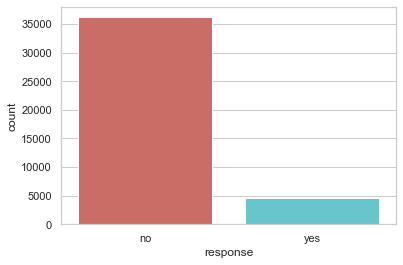

<Figure size 432x288 with 0 Axes>

In [70]:
sns.countplot(x='response',data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 36202 no's and 4639 yes's in the response variables.

In [71]:
df.groupby('response').mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
response,,,,,,,,,
no,20650.454726,40.703663,1031.402602,15.968786,3.691365,2.854704,28.722336,0.364593,0.0
yes,32588.659625,41.469713,1406.262988,15.043328,9.128474,2.145505,59.764389,1.000216,1.0


In [72]:
df.groupby('job').mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
job,,,,,,,,,
admin.,22624.120935,39.062274,944.721360,15.615090,4.097401,2.573220,39.179809,0.513709,0.119660
blue-collar,19045.821579,39.954685,950.183419,15.475071,4.407346,2.799091,34.177626,0.361272,0.072345
entrepreneur,20846.844030,41.882090,1032.443284,15.787313,4.243254,2.811194,27.766418,0.378358,0.081343
housemaid,21188.475196,46.219321,1012.594430,16.006092,4.132707,2.838120,18.476936,0.293299,0.087903
management,23480.160771,40.265382,1269.056743,16.176532,4.232542,2.902160,31.254057,0.500642,0.131349
other,22326.284810,45.943038,1540.841772,15.006329,3.793418,3.316456,23.240506,0.417722,0.094937
retired,26751.383663,61.140099,1486.372277,15.496040,4.740173,2.364356,33.107426,0.543564,0.221782
self-employed,22544.647956,40.325710,1180.018018,16.108801,4.483368,2.916147,26.803881,0.389466,0.112266
services,20202.390160,38.681926,865.224678,15.617732,4.312289,2.705867,32.729019,0.368324,0.087345


In [73]:
df.groupby('marital').mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
marital,,,,,,,,,
divorced,21120.482447,45.588606,926.490015,15.885852,4.373469,2.633382,32.387219,0.396679,0.116040
married,21329.800252,43.157705,1115.902074,15.900572,4.224499,2.854998,31.061686,0.424699,0.097926
single,23831.933147,33.699030,1045.026217,15.774972,4.463980,2.658569,34.745783,0.479507,0.146290


In [74]:
df.groupby('education').mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
education,,,,,,,,,
primary,19855.623621,45.790288,1069.766391,15.477022,4.257174,2.840993,28.493413,0.347120,0.083793
secondary,21390.207951,39.992158,967.081703,15.820088,4.324241,2.710847,33.711166,0.424566,0.103907
tertiary,24232.440388,39.569063,1265.593942,16.144750,4.309159,2.851050,31.636591,0.505735,0.146446


Visualizations

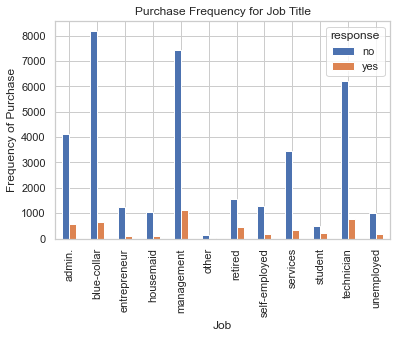

In [75]:
%matplotlib inline
pd.crosstab(df.job,df.response).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_free_job')

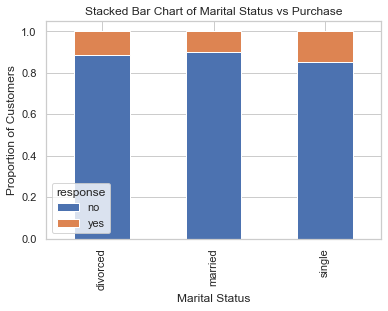

In [77]:
table=pd.crosstab(df.marital,df.response)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

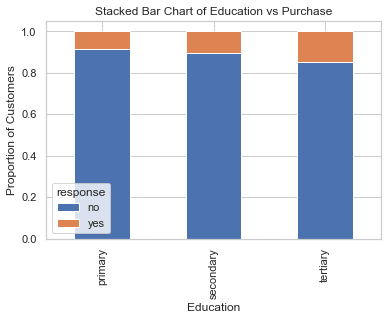

In [78]:
table=pd.crosstab(df.education,df.response)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

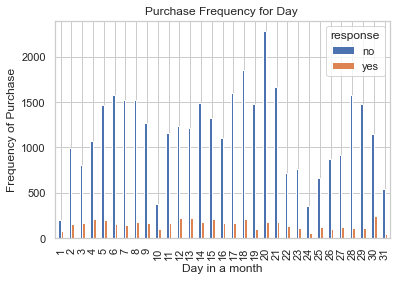

In [79]:
pd.crosstab(df.day,df.response).plot(kind='bar')
plt.title('Purchase Frequency for Day ')
plt.xlabel('Day in a month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

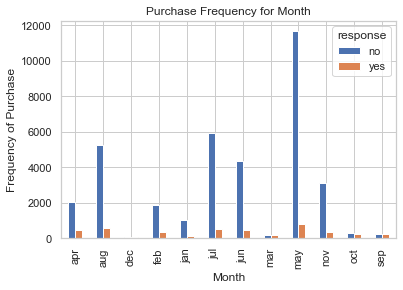

In [80]:
pd.crosstab(df.month,df.response).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

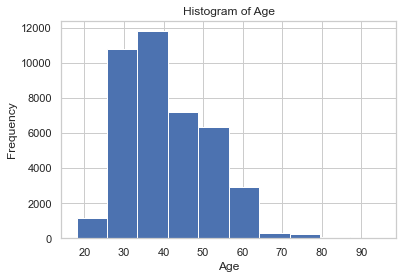

In [81]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

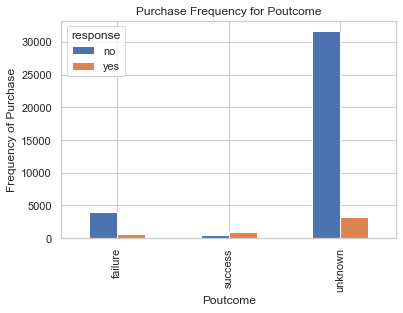

In [82]:
pd.crosstab(df.poutcome,df.response).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

### Create dummy variables

In [83]:
cat_vars=['job','marital','education','default','housing','loan','month','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1

In [84]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [85]:
df_final=df[to_keep]
df_final.columns.values

array(['Unnamed: 0', 'age', 'balance', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'response', 'response_binary', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_other', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_success', 'poutcome_unknown'],
      dtype=object)

In [86]:
df_final_vars=df_final.columns.values.tolist()
y=['response']
X=[i for i in df_final_vars if i not in y]

### Feature Selection

In [87]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(df_final[X], df_final[y] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the num

C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[False False False False False False False False  True False False False
 False False False  True False False False False False False  True False
 False False False False False  True  True False  True False  True False
 False  True  True  True  True  True  True  True  True  True  True  True]
[30 25 29 26  9 16 28 18  1  8 10 19 12 21 31  1 13 11  2 14 23 24  1  5
  6 22  3 17 20  1  1  4  1 27  1  7 15  1  1  1  1  1  1  1  1  1  1  1]


In [88]:
cols=["previous", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", 
      "poutcome_failure", "poutcome_unknown", "poutcome_success"] 
X=df_final[cols]
y=df_final['response']

### Logistic Regression Model Fitting

In [89]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [90]:
y_pred = lreg.predict(X_test)

In [91]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


### Cross Validation

In [92]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\SaranyaVarshniRK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


10-fold cross validation average accuracy: 0.896


### Confusion Matrix

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10731   139]
 [ 1129   254]]


The result is telling us that we have 10731+254 correct predictions and 1122+109 incorrect predictions.

#### Accuracy

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     10870
         yes       0.65      0.18      0.29      1383

    accuracy                           0.90     12253
   macro avg       0.78      0.59      0.62     12253
weighted avg       0.88      0.90      0.87     12253

